We can implement watermarking techniques in Python using three methods: between pixels, Least Significant Bit (LSB), and in the Fourier domain. Here's how you can do it:

**1. Between Pixels Method**

This method involves selecting a subset of pixels in the image and replacing them with the watermark. Note that this method requires the watermark to be the same size as the selected region.

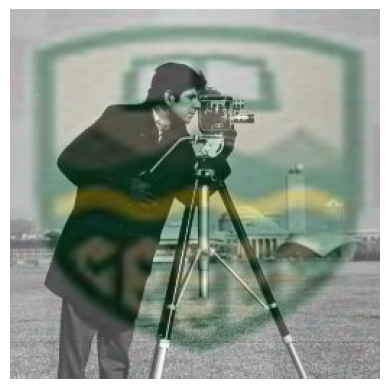

In [22]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def steganography_whole_image(image_path, watermark_path, strength=0.5):
    # Load images
    img = Image.open(image_path)
    watermark = Image.open(watermark_path)

    # Convert images to numpy arrays
    img_np = np.array(img)
    watermark_np = np.array(watermark)

    # Resize the watermark to match the image dimensions
    watermark_resized = watermark.resize((img.width, img.height))

    # Convert the resized watermark to a numpy array
    watermark_np_resized = np.array(watermark_resized)

    # Embed the watermark into the entire image
    img_np = (1 - strength) * img_np + strength * watermark_np_resized

    # Display the watermarked image using Matplotlib
    plt.imshow(img_np.astype(np.uint8))  # Convert back to uint8 for display
    plt.axis('off')  # Optional: Turn off axis labels
    plt.show()

# Call the function with a strength parameter (0.0 - 1.0)
steganography_whole_image(".\Data\cameraman.jpg", ".\Data\logo.jpg", strength=0.3)


**2. Least Significant Bit (LSB) Method**

This method involves replacing the least significant bit of each pixel in the image with the corresponding bit from the watermark.

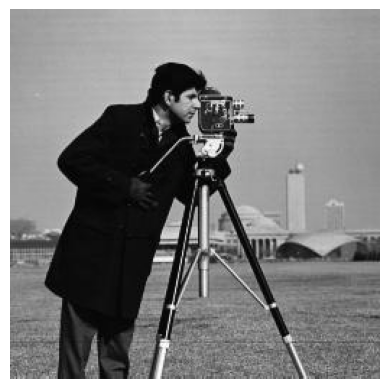

In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def steganography_lsb(image_path, watermark_path, strength=0.5):
    # Load images
    img = Image.open(image_path)
    watermark = Image.open(watermark_path)

    # Convert images to numpy arrays
    img_np = np.array(img)
    watermark_np = np.array(watermark)

    # Select a region in the image where the watermark will be inserted
    x_start, y_start = 100, 100
    x_end, y_end = x_start + watermark_np.shape[1], y_start + watermark_np.shape[0]

    # Resize the watermark to fit the region
    watermark_resized = watermark.resize((y_end - y_start, x_end - x_start))

    # Convert the resized watermark to a numpy array
    watermark_np_resized = np.array(watermark_resized)

    # Embed the watermark using LSB steganography
    for i in range(x_end - x_start):
        for j in range(y_end - y_start):
            for k in range(3):  # for each color channel (R, G, B)
                img_np[x_start + i, y_start + j, k] = (img_np[x_start + i, y_start + j, k] & 0xFE) | ((watermark_np_resized[i, j, k] >> 7) & 0x01)

    # Display the watermarked image using Matplotlib
    plt.imshow(img_np)
    plt.axis('off')  # Optional: Turn off axis labels
    plt.show()

# Call the function with a strength parameter (0.0 - 1.0)
steganography_lsb(".\Data\cameraman.jpg", ".\Data\logo.jpg", strength=0.5)


**3. Fourier Domain Method**

This method involves converting the image to the frequency domain, modifying the Fourier coefficients, and then converting back to the spatial domain.

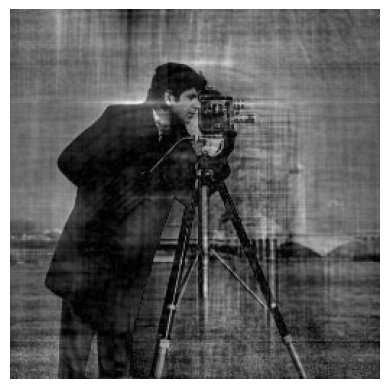

In [15]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

def steganography_frequency_domain(image_path, watermark_path, strength=0.5):
    # Load images
    img = Image.open(image_path)
    watermark = Image.open(watermark_path)

    # Convert images to grayscale
    img_gray = img.convert('L')
    watermark_gray = watermark.convert('L')

    # Convert images to numpy arrays
    img_np = np.array(img_gray)
    watermark_np = np.array(watermark_gray)

    # Perform Fourier Transform
    img_fft = np.fft.fft2(img_np)
    watermark_fft = np.fft.fft2(watermark_np, img_fft.shape)

    # Calculate amplitude spectrum and phase spectrum
    img_amp = np.abs(img_fft)
    img_phase = np.angle(img_fft)

    # Combine amplitude spectrum of the image with amplitude spectrum of the watermark
    watermarked_amp = (1 - strength) * img_amp + strength * watermark_fft

    # Reconstruct the watermarked image in the frequency domain
    watermarked_fft = watermarked_amp * np.exp(1j * img_phase)

    # Perform Inverse Fourier Transform
    watermarked_img = np.abs(np.fft.ifft2(watermarked_fft)).astype(np.uint8)

    # Display the watermarked image using Matplotlib
    plt.imshow(watermarked_img, cmap='gray')
    plt.axis('off')  # Optional: Turn off axis labels
    plt.show()

# Call the function with a strength parameter (0.0 - 1.0)
steganography_frequency_domain(".\Data\cameraman.jpg", ".\Data\logo.jpg", strength=0.5)
